In [2]:
from tensorflow.keras.models import load_model
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

2023-11-12 04:32:22.298637: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-12 04:32:22.328677: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-12 04:32:22.328704: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-12 04:32:22.328719: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-12 04:32:22.333561: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-12 04:32:22.334085: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [4]:


# Ruta donde está guardado tu modelo
modelo_ruta = "modeloDeReconocimientoDeGafasDeSol.keras"

# Cargar el modelo
loaded_model = load_model(modelo_ruta)

label_encoder = LabelEncoder()
label_encoder.classes_ = np.load("label_encoder.npy")



1/1 [==============================] - 0s 82ms/step


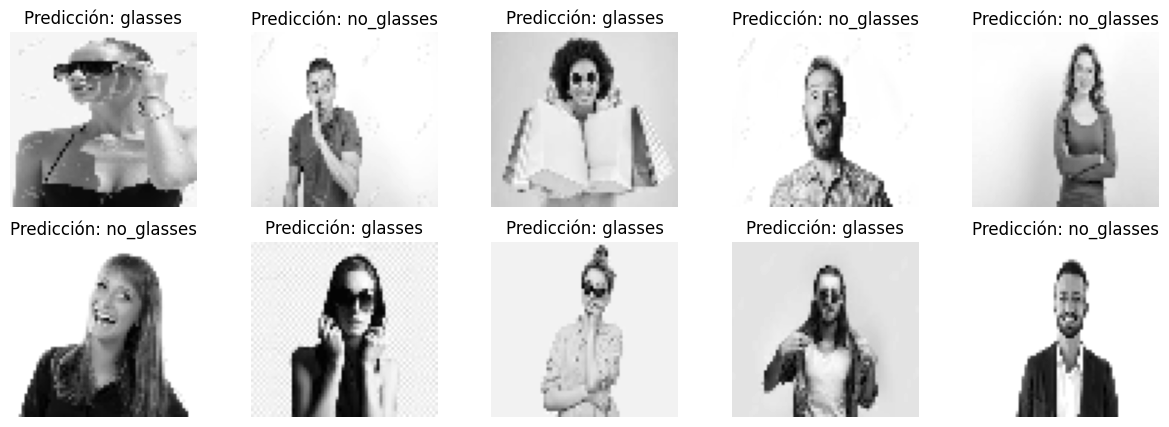

In [5]:
# Ruta a la carpeta que contiene las nuevas imágenes
new_images_path = "pruebaImagenesExternasDataSet"

# Función para cargar y preprocesar nuevas imágenes
def load_new_images(folder_path):
    images = []
    file_names = []
    
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (64, 60))  # Redimensionar a media resolución
        images.append(img)
        file_names.append(file)
        
    return np.array(images), file_names

# Cargar nuevas imágenes
new_images, new_image_names = load_new_images(new_images_path)

# Expandir las dimensiones de las imágenes
new_images_expanded = np.expand_dims(new_images, axis=-1)

# Realizar predicciones con el modelo
predictions = loaded_model.predict(new_images_expanded)
predicted_classes = np.argmax(predictions, axis=1)

# Decodificar las clases predichas
decoded_classes = label_encoder.inverse_transform(predicted_classes)

# Mostrar los resultados
plt.figure(figsize=(15, 5))
for i in range(len(new_image_names)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(new_images[i], cmap='gray')
    plt.title(f'Predicción: {decoded_classes[i]}')
    plt.axis('off')

plt.show()